In [1]:
import	pandas	as	pd
import	numpy	as	np
import	matplotlib.pyplot	as	plt
import	seaborn	as	sns
from	sklearn.model_selection	import	train_test_split
from	sklearn.preprocessing	import	PowerTransformer
from	sklearn.metrics	import	r2_score,mean_absolute_error,mean_squared_error

In [2]:
data	=	pd.read_csv('AirQuality.csv',sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
data.shape

(9471, 17)

In [4]:
data.duplicated().sum()

np.int64(113)

In [5]:
 data	=	data.drop_duplicates()

In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9358 entries, 0 to 9357
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.3+ MB


In [7]:
data.isna().sum()

,0
Date,1
Time,1
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1


In [13]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [14]:
 data	=	data.rename(columns={'T':	'Temperature'})
 data	=	data.rename(columns={'RH':	'Relative	Humidity'})
 data	=	data.rename(columns={'AH':	'Absolute	Humidity'})

In [15]:
 data['CO(GT)']	=	data['CO(GT)'].str.replace(',',	'.').astype(float)
 data['C6H6(GT)']	=	data['C6H6(GT)'].str.replace(',',	'.').astype(float)
 data['Temperature']	=	data['Temperature'].str.replace(',',	'.').astype(float)
 data['Relative	Humidity']	=	data['Relative	Humidity'].str.replace(',',	'.').astype(float)
 data['Absolute	Humidity']	=	data['Absolute	Humidity'].str.replace(',',	'.').astype(float)

In [16]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [17]:
 data.drop(['Date','Time'],axis=1,inplace=True)

In [18]:
 data.isna().sum()

,0
CO(GT),1
PT08.S1(CO),1
NMHC(GT),1
C6H6(GT),1
PT08.S2(NMHC),1
NOx(GT),1
PT08.S3(NOx),1
NO2(GT),1
PT08.S4(NO2),1
PT08.S5(O3),1


In [19]:
data	=	data.dropna()

In [20]:
data.duplicated().sum()

np.int64(31)

In [21]:
 data.isna().sum()


,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [22]:
 data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [23]:
 data.shape

(9357, 13)

**2)Data Integration**

In [24]:
 common_columns	=	["CO(GT)",	"NO2(GT)"]

In [25]:
data1	=	data[common_columns	+	["C6H6(GT)",	"NOx(GT)"]]

In [26]:
data2	=	data[common_columns	+	["PT08.S1(CO)",	"PT08.S2(NMHC)",	"PT08.S3(NOx)",	"PT08.S4(NO2)",	"PT08.S5(O3)",	"Temperature","Relative	Humidity",	"Absolute	Humidity"]]

In [27]:
 data1_sample	=	data1.head(50)
 data2_sample	=	data2.head(50)

In [28]:
inner_join	=	pd.merge(data1_sample,	data2_sample,	on=common_columns,	how="inner")

In [29]:
inner_join.head()

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,2.6,113.0,11.9,166.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [30]:
 left_join	=	pd.merge(data1_sample,	data2_sample,	on=common_columns,	how="left")

In [31]:
left_join.head()

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,2.6,113.0,11.9,166.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [32]:
 #concat  along rows
 concat_rows	=	pd.concat([data1_sample,	data2_sample],	axis=0)
 #concat along 	columns	(axis=1)
 concat_columns	=	pd.concat([data1_sample,	data2_sample],	axis=1)

In [33]:
 concat_rows

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,2.6,113.0,11.9,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,92.0,9.4,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.2,114.0,9.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.2,122.0,9.2,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.6,116.0,6.5,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45,2.9,126.0,NaN,NaN,1353.0,1122.0,922.0,1740.0,1139.0,15.8,37.0,0.6610
46,2.8,120.0,NaN,NaN,1309.0,1073.0,954.0,1657.0,1112.0,15.9,37.2,0.6657
47,2.4,119.0,NaN,NaN,1274.0,1041.0,1006.0,1610.0,994.0,16.9,34.3,0.6549
48,3.9,149.0,NaN,NaN,1510.0,1277.0,812.0,1910.0,1410.0,15.1,39.6,0.6766


In [34]:
 concat_columns.head()

,CO(GT),NO2(GT),C6H6(GT),NOx(GT),CO(GT),NO2(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,2.6,113.0,11.9,166.0,2.6,113.0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,92.0,9.4,103.0,2.0,92.0,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,114.0,9.0,131.0,2.2,114.0,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,122.0,9.2,172.0,2.2,122.0,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,116.0,6.5,131.0,1.6,116.0,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


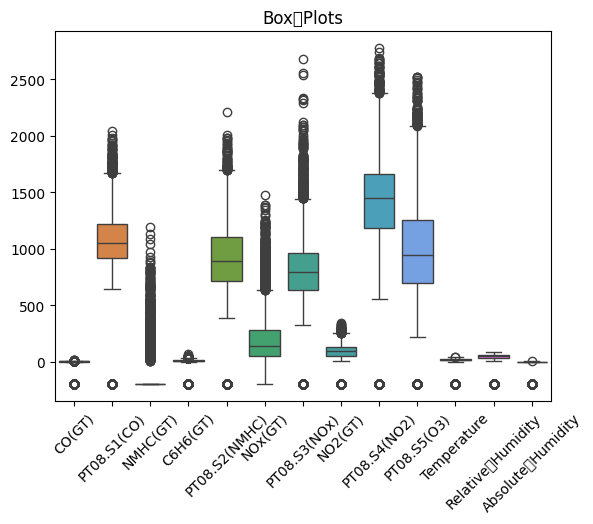

In [35]:
 sns.boxplot(data)
 plt.xticks(rotation=45)
 plt.title('Box	Plots');

In [36]:
def	remove_outliers(data,column,lower=0.01,upper=0.99):
 lower_bound	=	data[column].quantile(lower)
 upper_bound	=	data[column].quantile(upper)
 cleaned_data	=	data[(data[column]	>=	lower_bound)	&	(data[column]	<=	upper_bound)]
 outliers	=	data[(data[column]	<=	lower_bound)	|	(data[column]	>=	upper_bound)]
 return	cleaned_data,outliers

In [38]:
 df	=	data.copy()

 all_outliers	=	{}

 for	i	in	data.columns:
      cleaned_data,outliers	=	remove_outliers(df,i)

      df	=	cleaned_data
      all_outliers[i]	=	outliers

In [39]:
 df	=	df.reset_index().drop('index',axis=1)

In [40]:
 df.shape

(8219, 13)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


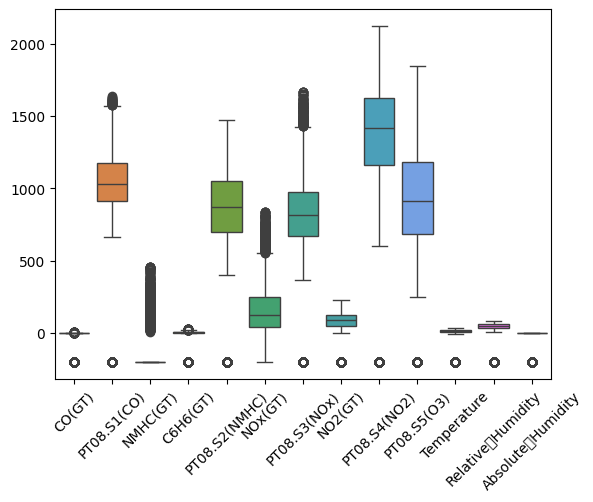

In [41]:
 sns.boxplot(df)
 plt.xticks(rotation=45)
 plt.show()

**4)Data Transformation**

In [42]:
 from	sklearn.preprocessing	import	MinMaxScaler
 #Normalization
 #	Initialize	scaler
 scaler	=	MinMaxScaler()
 #	Select	only	numeric	columns	for	scaling
 num_cols	=	df.select_dtypes(include=['number']).columns
 #	Apply	Min-Max	scaling
 df[num_cols]	=	scaler.fit_transform(df[num_cols])
 df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative\tHumidity,Absolute\tHumidity
0,0.981589,0.849673,0.530303,0.935128,0.746108,0.352262,0.673458,0.733021,0.815517,0.717147,0.892231,0.879816,0.994024
1,0.978682,0.812636,0.472727,0.924095,0.691617,0.291627,0.736729,0.683841,0.758190,0.572545,0.890977,0.875574,0.993864
2,0.979651,0.872549,0.436364,0.922330,0.682036,0.318576,0.718499,0.735363,0.756466,0.622374,0.885129,0.897844,0.993987
3,0.979651,0.858388,0.424242,0.923213,0.687425,0.358037,0.692761,0.754098,0.768966,0.685393,0.881370,0.919053,0.994167
4,0.976744,0.801743,0.380303,0.911297,0.620359,0.318576,0.753351,0.740047,0.728448,0.639961,0.882206,0.917639,0.994178


**5)Model Building**

In [43]:
 y	=	df['Temperature']
 X	=	df.drop('Temperature',axis=1)

In [44]:
 X_train,X_test,y_train,y_test	=	train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10,shuffle=True)

In [46]:
from	sklearn.linear_model	import	LinearRegression
from	sklearn.tree	import	DecisionTreeRegressor
from	sklearn.ensemble	import	RandomForestRegressor

In [47]:
 #	Linear	Regression	Model
 lin_reg	=	LinearRegression()
 lin_reg.fit(X_train,	y_train)
 lin_reg_preds	=	lin_reg.predict(X_test)
 #	Decision	Tree	Regressor	Model
 tree_reg	=	DecisionTreeRegressor()
 tree_reg.fit(X_train,	y_train)
 tree_reg_preds	=	tree_reg.predict(X_test)


 rf_reg	=	RandomForestRegressor()
 rf_reg.fit(X_train,	y_train)
 rf_reg_preds	=	rf_reg.predict(X_test)

In [48]:
 #	Evaluation	Metrics	for	Linear	Regression
 lin_reg_r2	=	r2_score(y_test,	lin_reg_preds)
 lin_reg_mae	=	mean_absolute_error(y_test,	lin_reg_preds)
 lin_reg_mse	=	mean_squared_error(y_test,	lin_reg_preds)
 lin_reg_accuracy	=	lin_reg_r2	*	100		#	Accuracy	as	percentage
 #	Evaluation	Metrics	for	Decision	Tree	Regressor
 tree_reg_r2	=	r2_score(y_test,	tree_reg_preds)
 tree_reg_mae	=	mean_absolute_error(y_test,	tree_reg_preds)
 tree_reg_mse	=	mean_squared_error(y_test,	tree_reg_preds)
 tree_reg_accuracy	=	tree_reg_r2	*	100		#	Accuracy	as	percentage
 #	Evaluation	Metrics	for	Random	Forest	Regressor
 rf_reg_r2	=	r2_score(y_test,	rf_reg_preds)
 rf_reg_mae	=	mean_absolute_error(y_test,	rf_reg_preds)
 rf_reg_mse	=	mean_squared_error(y_test,	rf_reg_preds)
 rf_reg_accuracy	=	rf_reg_r2	*	100		#	Accuracy	as	percentage

In [49]:
 #	Printing	the	results
 print("Linear	Regression:")
 print(f'		Mean	Squared	Error:	{lin_reg_mse}')
 print(f'		Mean	Absolute	Error:	{lin_reg_mae}')
 print(f'		R²	Score:	{lin_reg_r2}')
 print(f'		Accuracy:	{lin_reg_accuracy:.2f}%')
 print("\nDecision	Tree	Regressor:")
 print(f'		Mean	Squared	Error:	{tree_reg_mse}')
 print(f'		Mean	Absolute	Error:	{tree_reg_mae}')
 print(f'		R²	Score:	{tree_reg_r2}')
 print(f'		Accuracy:	{tree_reg_accuracy:.2f}%')
 #	Print	the	metrics
 print(f"\nRandom	Forest	Regressor	R²	Score:	{rf_reg_r2:.4f}")
 print(f"Random	Forest	Regressor	MAE:	{rf_reg_mae:.4f}")
 print(f"Random	Forest	Regressor	MSE:	{rf_reg_mse:.4f}")
 print(f"Random	Forest	Regressor	Accuracy:	{rf_reg_accuracy:.2f}%")

Linear	Regression:
		Mean	Squared	Error:	0.00014690170778673502
		Mean	Absolute	Error:	0.009394488844115614
		R²	Score:	0.9951939653387994
		Accuracy:	99.52%

Decision	Tree	Regressor:
		Mean	Squared	Error:	7.38536165816108e-06
		Mean	Absolute	Error:	0.001625617165378979
		R²	Score:	0.9997583805889707
		Accuracy:	99.98%

Random	Forest	Regressor	R²	Score:	0.9999
Random	Forest	Regressor	MAE:	0.0008
Random	Forest	Regressor	MSE:	0.0000
Random	Forest	Regressor	Accuracy:	99.99%
